In [581]:
from random import random, seed
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from itertools import accumulate
from icecream import ic

In [582]:
UNIVERSE_SIZE = 1000 
NUM_SETS = 200
DENSITY = 0.3 
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [583]:
SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

In [584]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    phenotype= np.logical_or.reduce(SETS[solution])
    return np.all(phenotype)


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

In [585]:
def tweak(solution: np.ndarray)->np.ndarray:
    new_solution= solution.copy() 
    i= rng.integers(0,NUM_SETS)
    new_solution[i]=not new_solution[i]
    return new_solution

In [586]:
def fitness(solution: np.ndarray):
    return (valid(solution),-cost(solution))

In [587]:
SOLUTION=rng.random(NUM_SETS) < 0.2

ic| fitness(solution): (np.True_, np.float64(-20356.692891000584))
ic| fitness(solution): (np.True_, np.float64(-7813.357529569853))


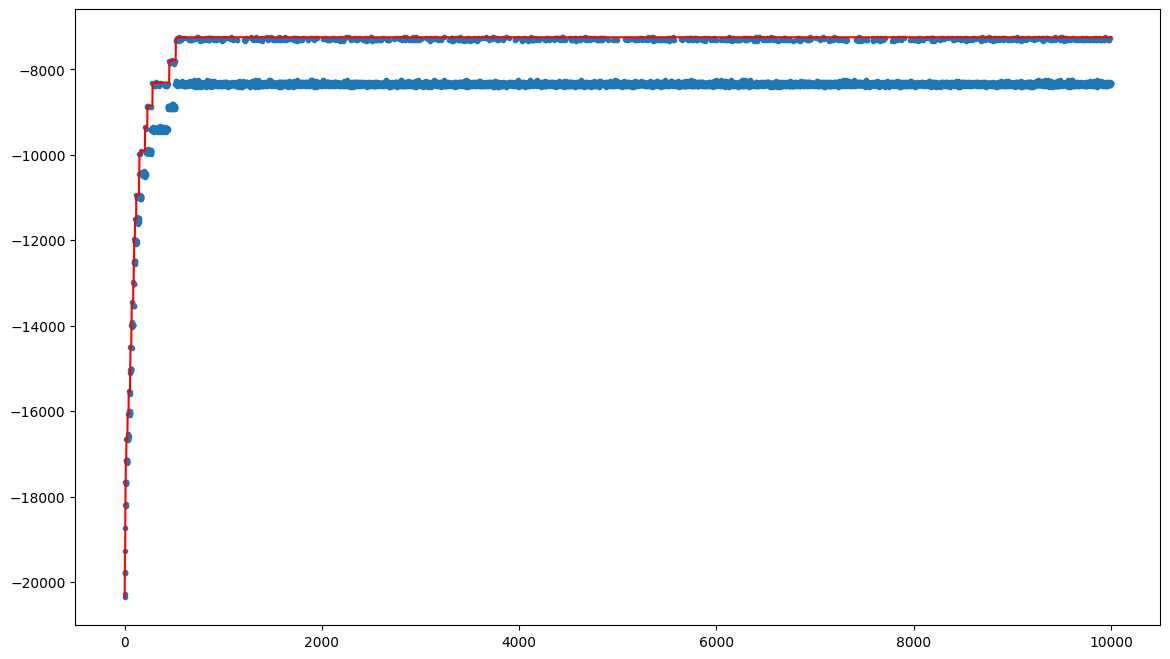

In [588]:
solution = SOLUTION.copy()
solution_fitness=fitness(solution)
history=[solution_fitness[1]]
ic(fitness(solution))
for steps in range(10_000):
    new_solution= tweak(solution)
    f=fitness(new_solution)
    history.append(f[1])
    if f> solution_fitness:
        solution=new_solution
        solution_fitness=fitness(solution)

ic(fitness(solution))
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

In [589]:
#from the graph it is clear that we should explore more since the solution reaches a local optimum

In [590]:

def multiple_mutation(solution: np.ndarray)->np.ndarray:
    mask = rng.random(NUM_SETS) < 0.05
    new_solution=np.logical_xor(solution,mask)

    return new_solution

ic| fitness(solution): (np.True_, np.float64(-20356.692891000584))
ic| fitness(solution): (np.True_, np.float64(-9479.756258639849))


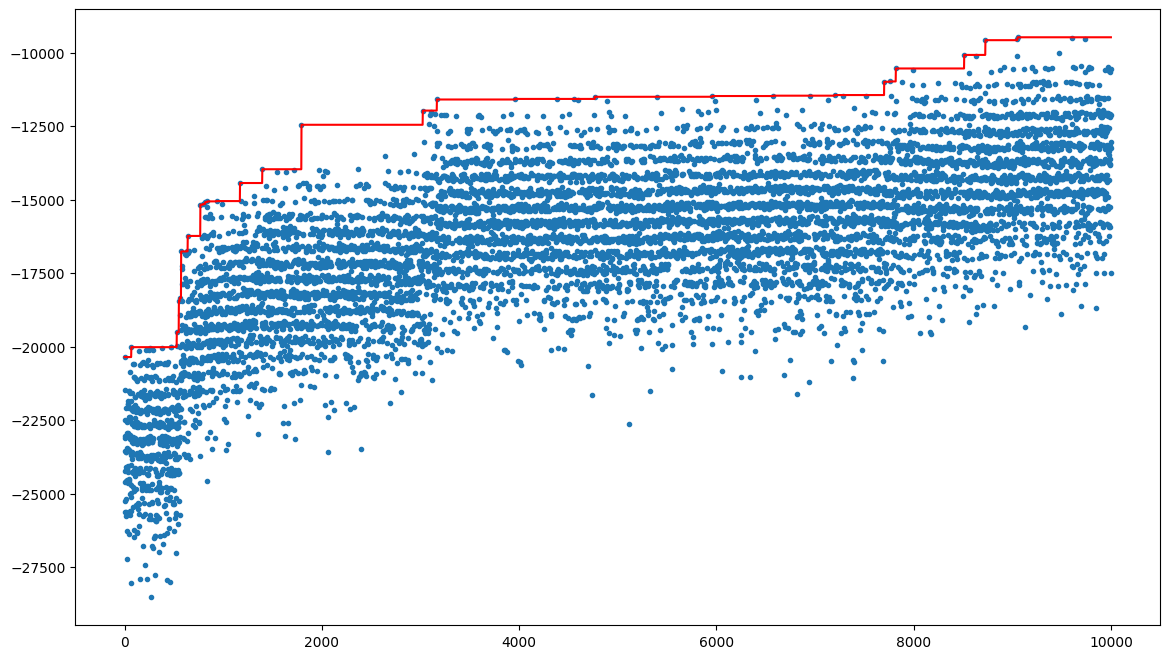

In [591]:
solution = SOLUTION.copy()
solution_fitness=fitness(solution)
history=[solution_fitness[1]]
ic(fitness(solution))
for steps in range(10_000):
    new_solution= multiple_mutation(solution)
    f=fitness(new_solution)
    history.append(f[1])
    if f> solution_fitness:
        solution=new_solution
        solution_fitness=fitness(solution)

ic(fitness(solution))
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| fitness(solution): (np.True_, np.float64(-20356.692891000584))
ic| fitness(solution): (np.True_, np.float64(-7784.5888887561505))


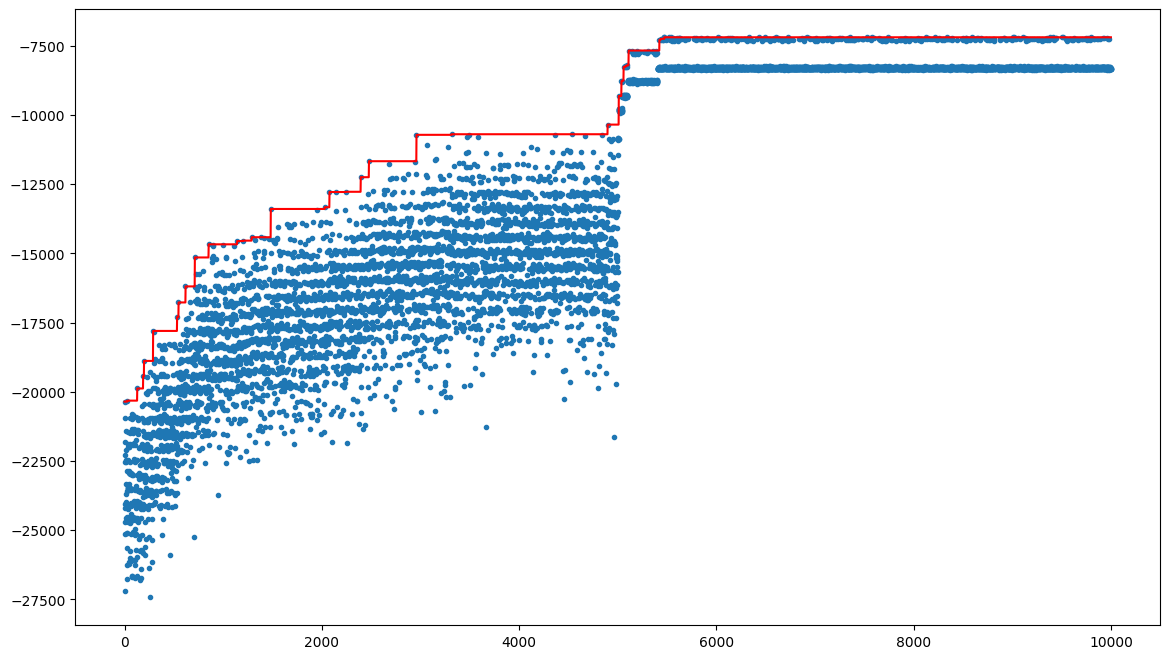

In [592]:
solution = SOLUTION.copy()
solution_fitness=fitness(solution)
history=[solution_fitness[1]]
ic(fitness(solution))
for steps in range(10_000):
    if steps<5000:
        new_solution= multiple_mutation(solution)
    else:
        new_solution=tweak(solution)
    f=fitness(new_solution)
    history.append(f[1])
    if f> solution_fitness:
        solution=new_solution
        solution_fitness=fitness(solution)

ic(fitness(solution))
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| solution_fitness: (np.True_, np.float64(-20356.692891000584))
ic| solution_fitness: (np.True_, np.float64(-6395.857851912289))


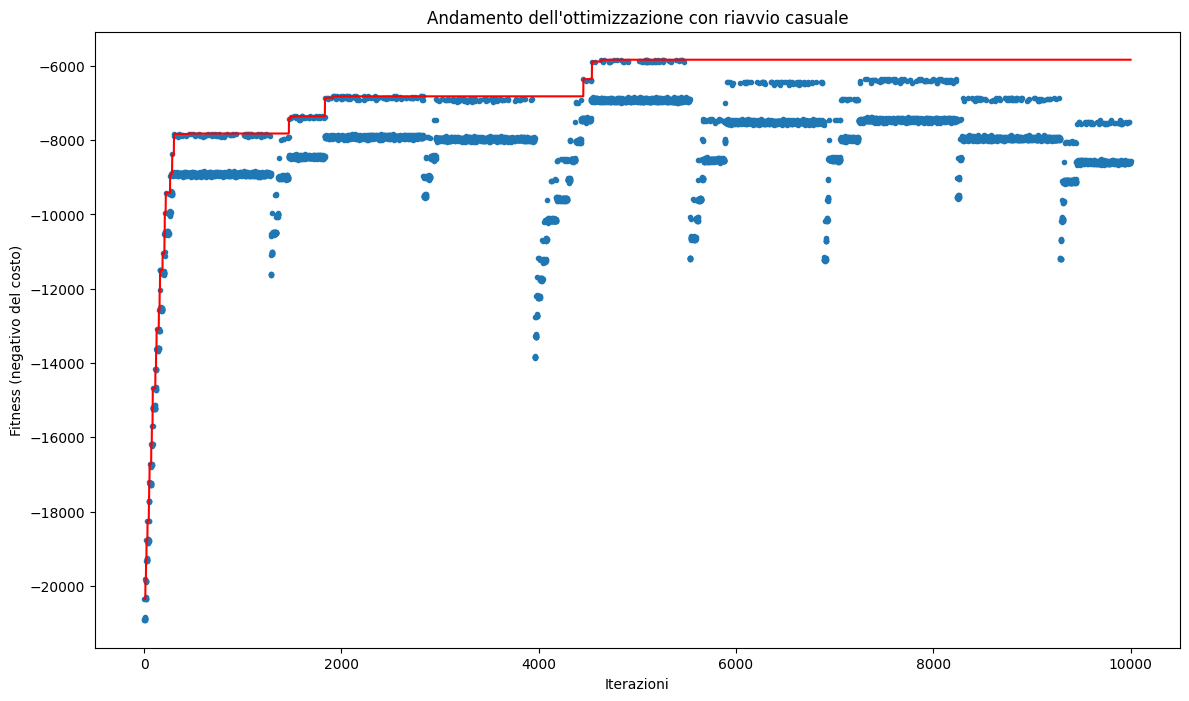

In [593]:
solution = SOLUTION.copy()
solution_fitness=fitness(solution)
ic(solution_fitness)

best_solution=solution.copy()
best_fitness=solution_fitness
history=[solution_fitness[1]]

max_iterations=10_000
iterations_without_improvement = 0
max_iterations_without_improvement = 1000


for steps in range(max_iterations):
    new_solution=tweak(solution)
    new_fitness=fitness(new_solution)

    history.append(new_fitness[1])

    if new_fitness > solution_fitness:
        solution=new_solution
        solution_fitness=new_fitness
        iterations_without_improvement=0

        if solution_fitness > best_fitness:
            best_solution = solution.copy()
            best_fitness = solution_fitness
    else:
        iterations_without_improvement += 1
        if iterations_without_improvement >= max_iterations_without_improvement:
            new_solution= multiple_mutation(solution)
            new_fitness = fitness(new_solution)
            solution = new_solution
            solution_fitness = new_fitness
            iterations_without_improvement = 0
            # i can have also a non valid solution
            if new_fitness[1] > best_fitness[1]:
                best_solution = new_solution
                best_fitness = new_fitness
solution = best_solution
solution_fitness = best_fitness
ic(solution_fitness)
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")
plt.title("Andamento dell'ottimizzazione con riavvio casuale")
plt.xlabel("Iterazioni")
plt.ylabel("Fitness (negativo del costo)")
plt.show()